In [45]:
import numpy as np
import os
import glob
import pandas as pd
import shutil
from tqdm import tqdm
import mdtraj as md
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg

In [ ]:
metadata_csv_path = '/data/rsg/chemistry/jyim/projects/flow-matching/swiss_prot/swiss_prot_pkls/metadata.csv'
metadata_df = pd.read_csv(metadata_csv_path)

In [53]:
metadata_df.processed_path = metadata_df.processed_path.map(
    lambda x: x.replace('/Mounts/rbg-storage1/users/jyim/large_data', '/data/rsg/chemistry/jyim/projects/flow-matching/swiss_prot'))

In [54]:
metadata_df.to_csv(metadata_csv_path)

In [52]:
metadata_df.processed_path.iloc[0]

'/Mounts/rbg-storage1/users/jyim/large_data/swiss_prot_pkls/1/AF-B1LHV9-F1-model_v4.pkl'

In [48]:
metadata_csv_path = '/data/rsg/chemistry/jyim/projects/flow-matching/swiss_prot/swiss_prot_pkls/metadata.csv'
metadata_df = pd.read_csv(metadata_csv_path)

In [43]:
print(f'Raw data size {len(metadata_df)}')
confident_df = metadata_df[metadata_df.num_confident_plddt > 0.5]
print(f'Confident data size {len(confident_df)}')
length_df = confident_df[confident_df.seq_len < 512]
print(f'Length filtered size {len(length_df)}')
final_df = length_df[length_df.coil_percent < 0.7]
print(f'Final size {len(final_df)}')

Raw data size 542370
Confident data size 504941
Length filtered size 419160
Final size 416262


Text(0, 0.5, 'Count')

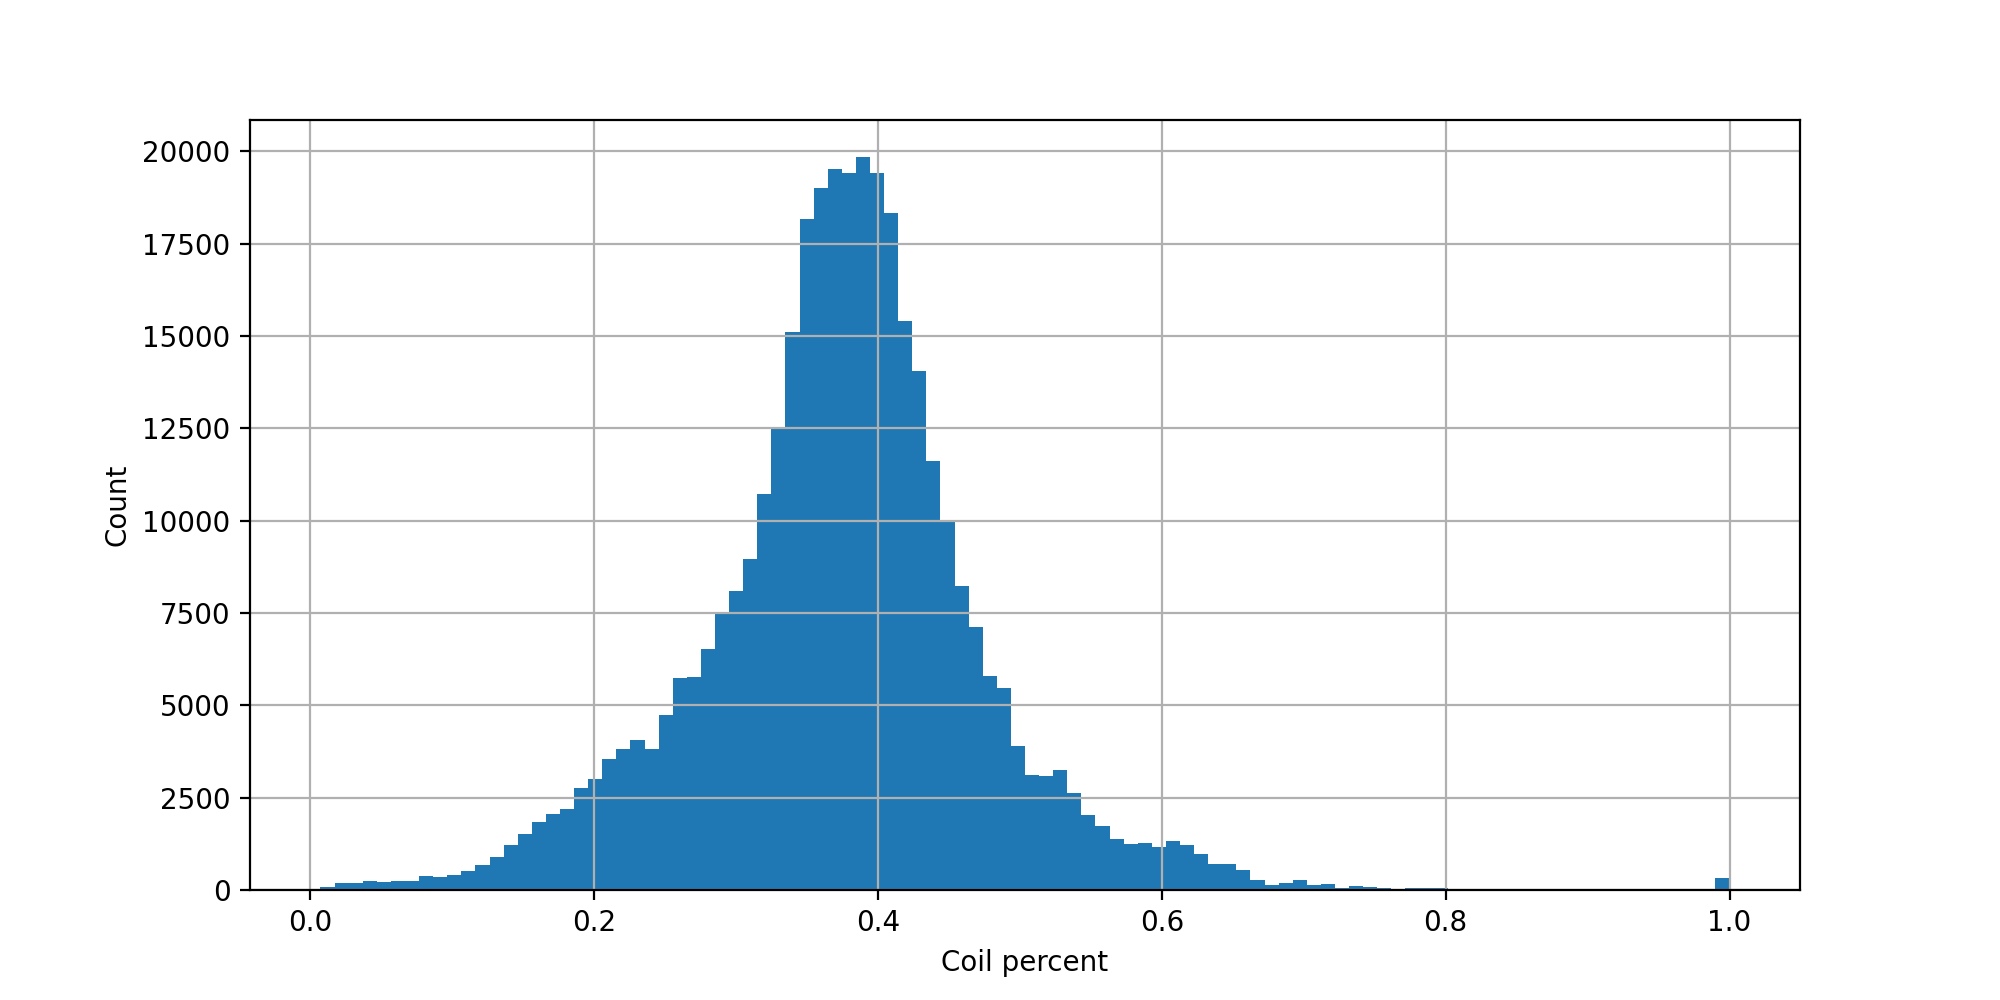

In [39]:
plt.figure(figsize=(10, 5))
_ = length_df.coil_percent.hist(bins=100)
plt.xlabel('Coil percent')
plt.ylabel('Count')

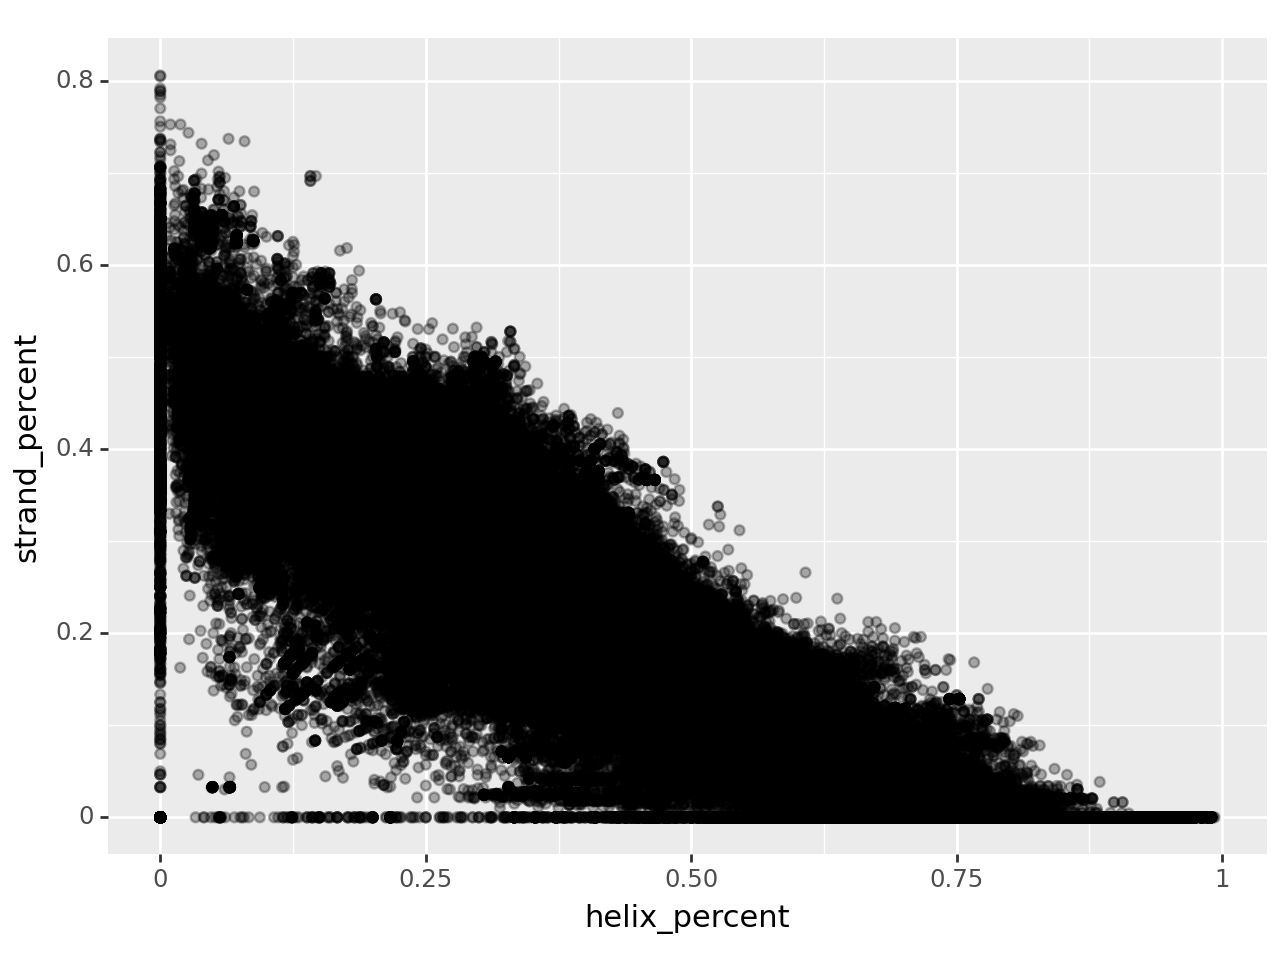

<Figure Size: (640 x 480)>

In [35]:
(
    gg.ggplot(length_df, gg.aes(x='helix_percent', y='strand_percent'))
    + gg.geom_point(alpha=0.3)
)

In [34]:
length_df.head()

,pdb_name,processed_path,raw_path,oligomeric_count,oligomeric_detail,num_chains,avg_plddt,num_confident_plddt,seq_len,modeled_seq_len,coil_percent,helix_percent,strand_percent,radius_gyration
0,AF-B1LHV9-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,89.454103,0.882051,195,195,0.502564,0.092308,0.405128,2.218788
1,AF-A6UZL1-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,92.549612,0.953488,129,129,0.480620,0.248062,0.271318,1.874236
4,AF-O67074-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,94.579406,0.955446,202,202,0.386139,0.440594,0.173267,1.731721
7,AF-Q8PJX7-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,92.503779,0.916388,299,299,0.411371,0.401338,0.187291,2.025203
9,AF-Q60269-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,88.018675,0.918072,415,415,0.332530,0.513253,0.154217,2.392335


Text(0, 0.5, 'Count')

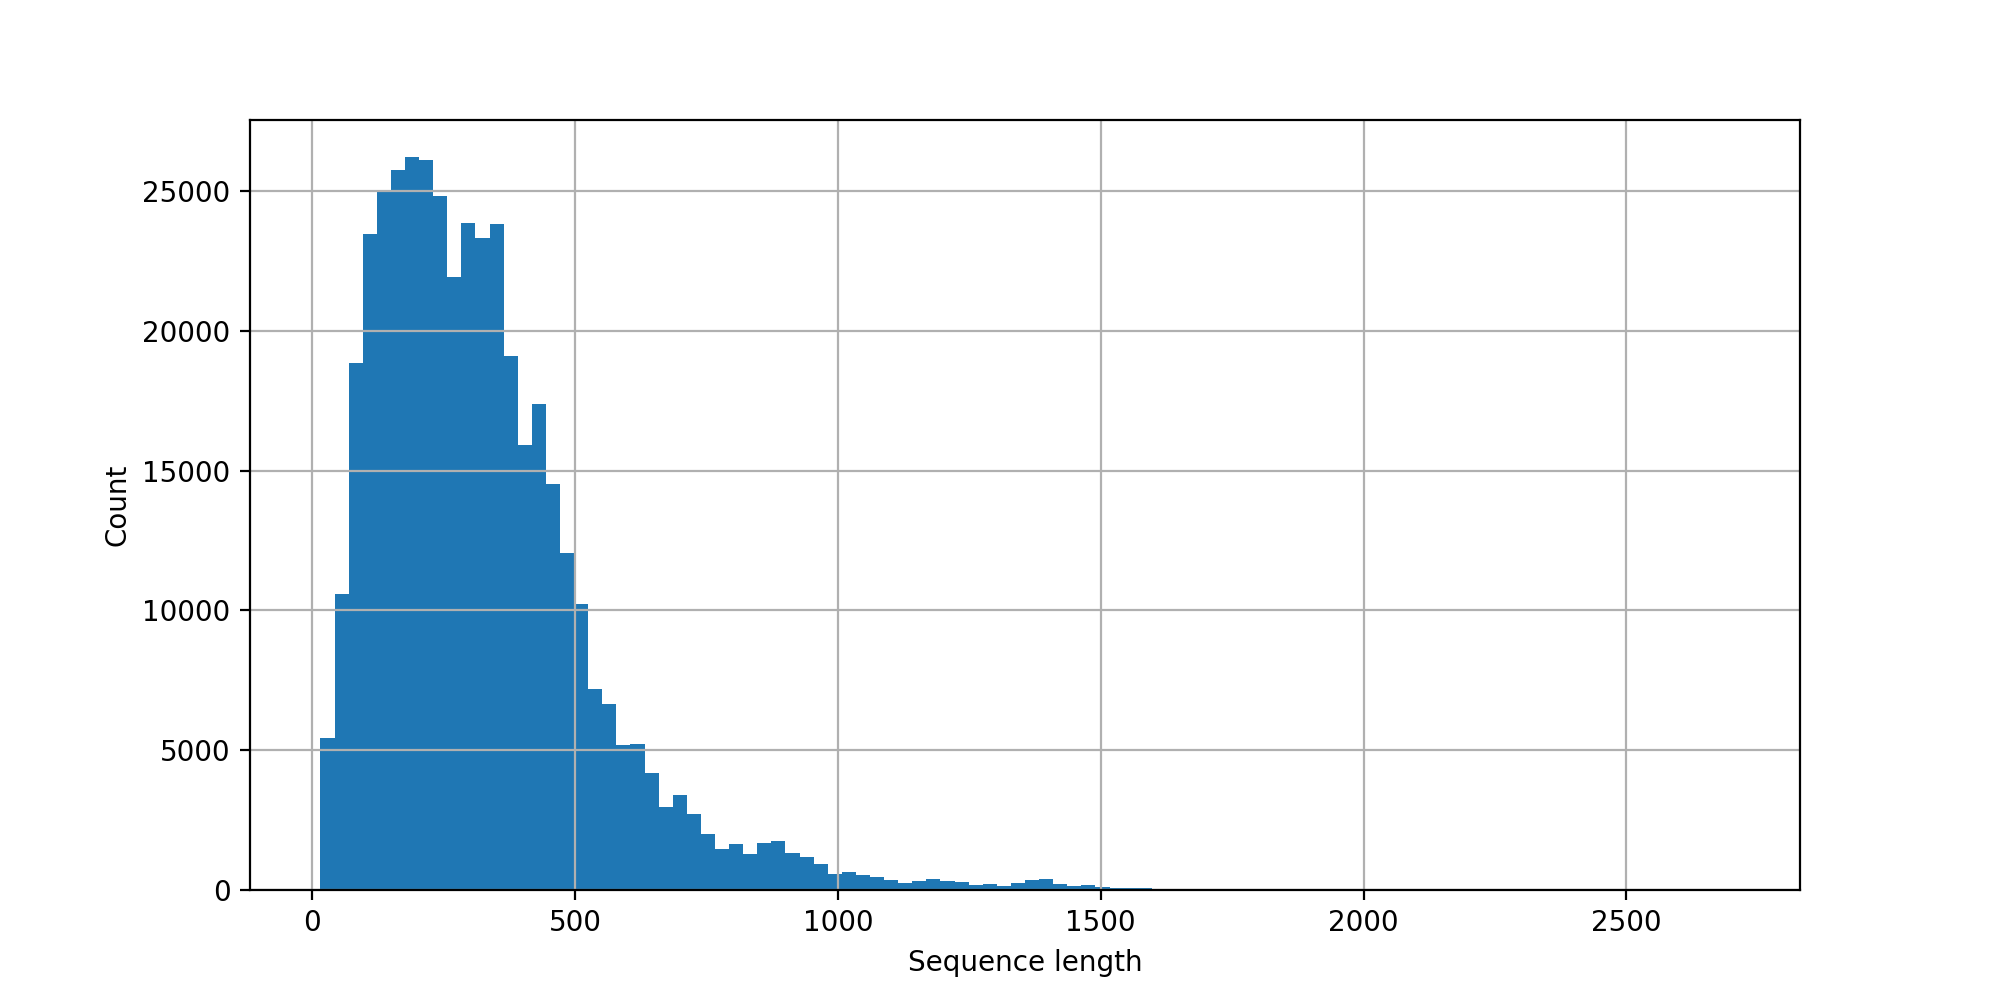

In [26]:
plt.figure(figsize=(10, 5))
_ = confident_df.seq_len.hist(bins=100)
plt.xlabel('Sequence length')
plt.ylabel('Count')

In [31]:
750 ** 2

562500

In [29]:
length_filter_df = confident_df[confident_df.seq_len < 750]

In [30]:
length_filter_df.shape

(386286, 14)

Text(0, 0.5, 'Count')

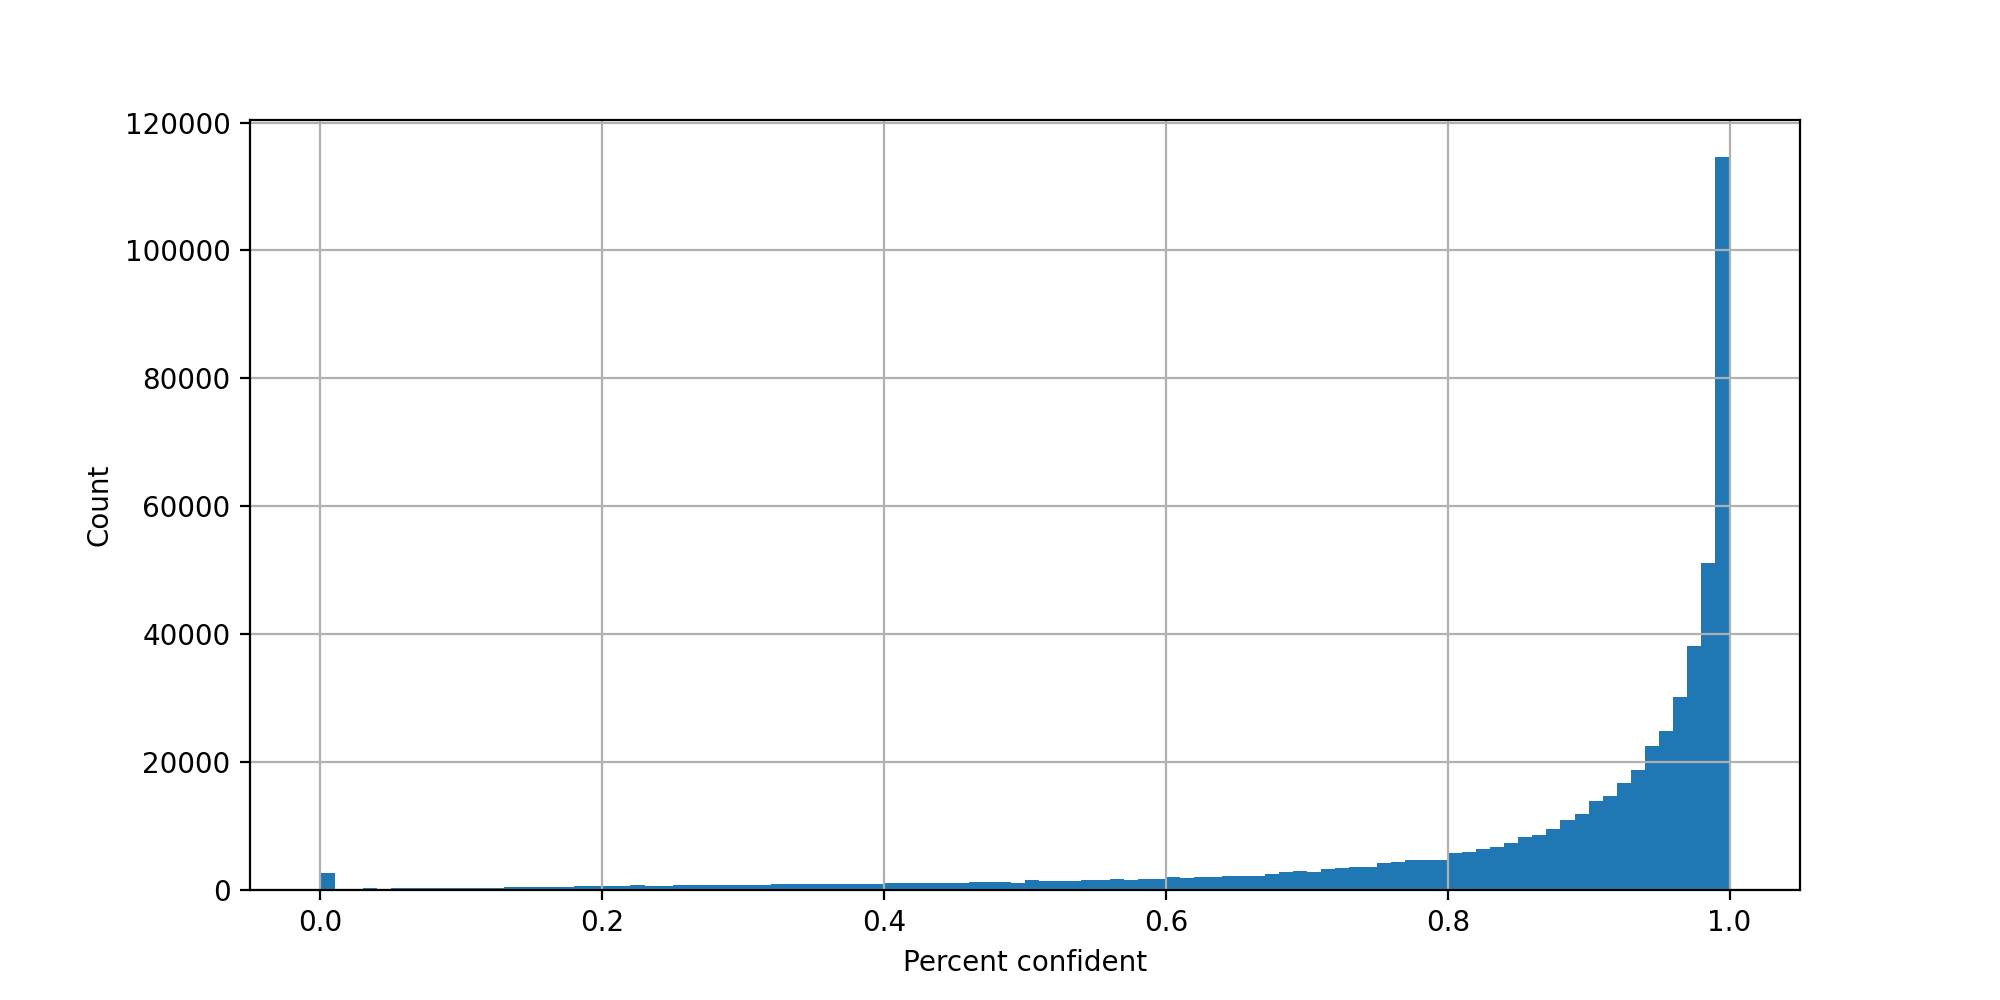

In [21]:
plt.figure(figsize=(10, 5))
_ = metadata_df.num_confident_plddt.hist(bins=100)
plt.xlabel('Percent confident')
plt.ylabel('Count')

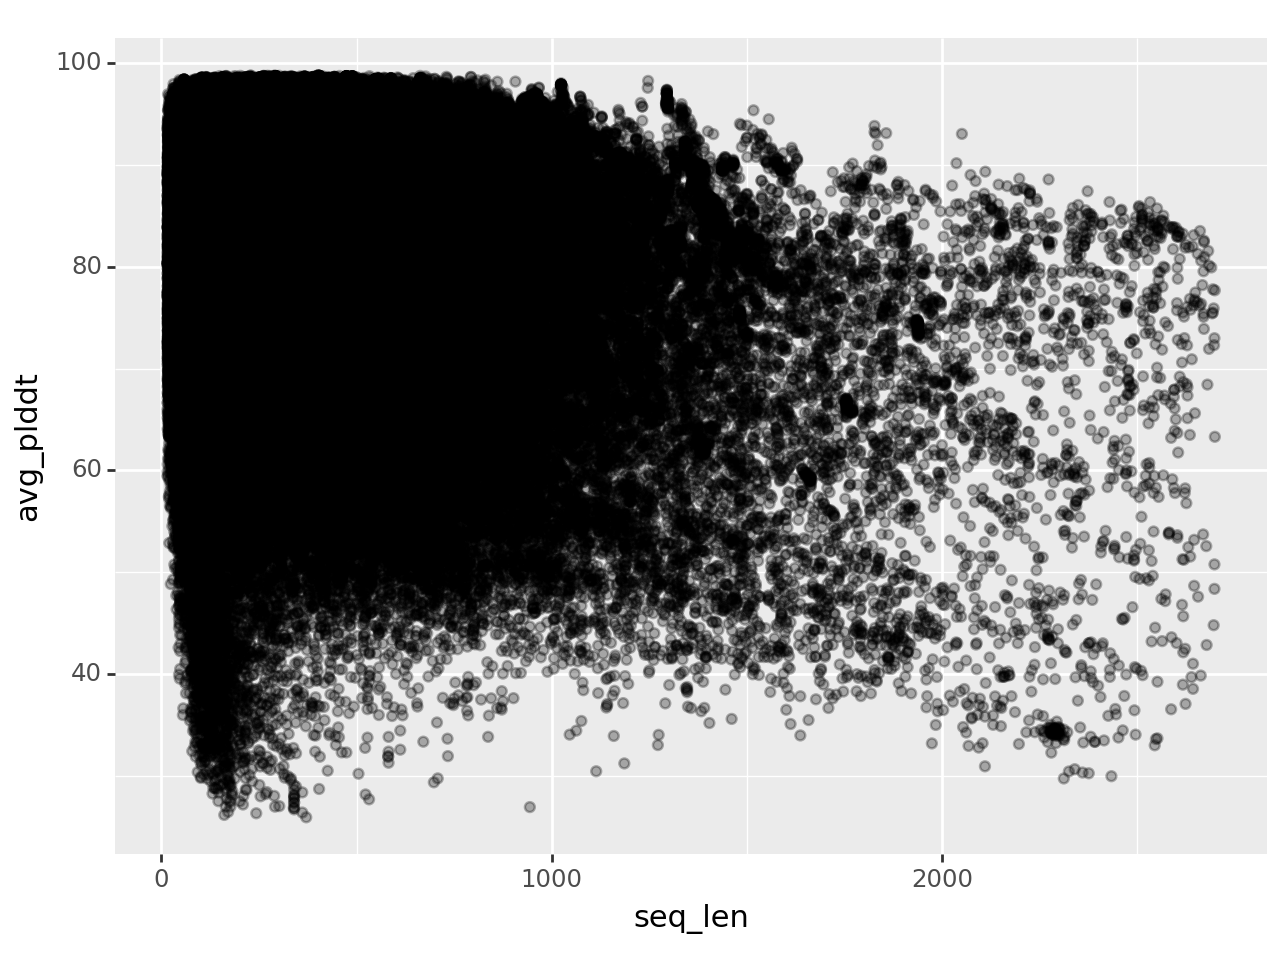

<Figure Size: (640 x 480)>

In [17]:
(
    gg.ggplot(metadata_df, gg.aes(x='seq_len', y='avg_plddt'))
    + gg.geom_point(alpha=0.3)
)

Text(0, 0.5, 'Count')

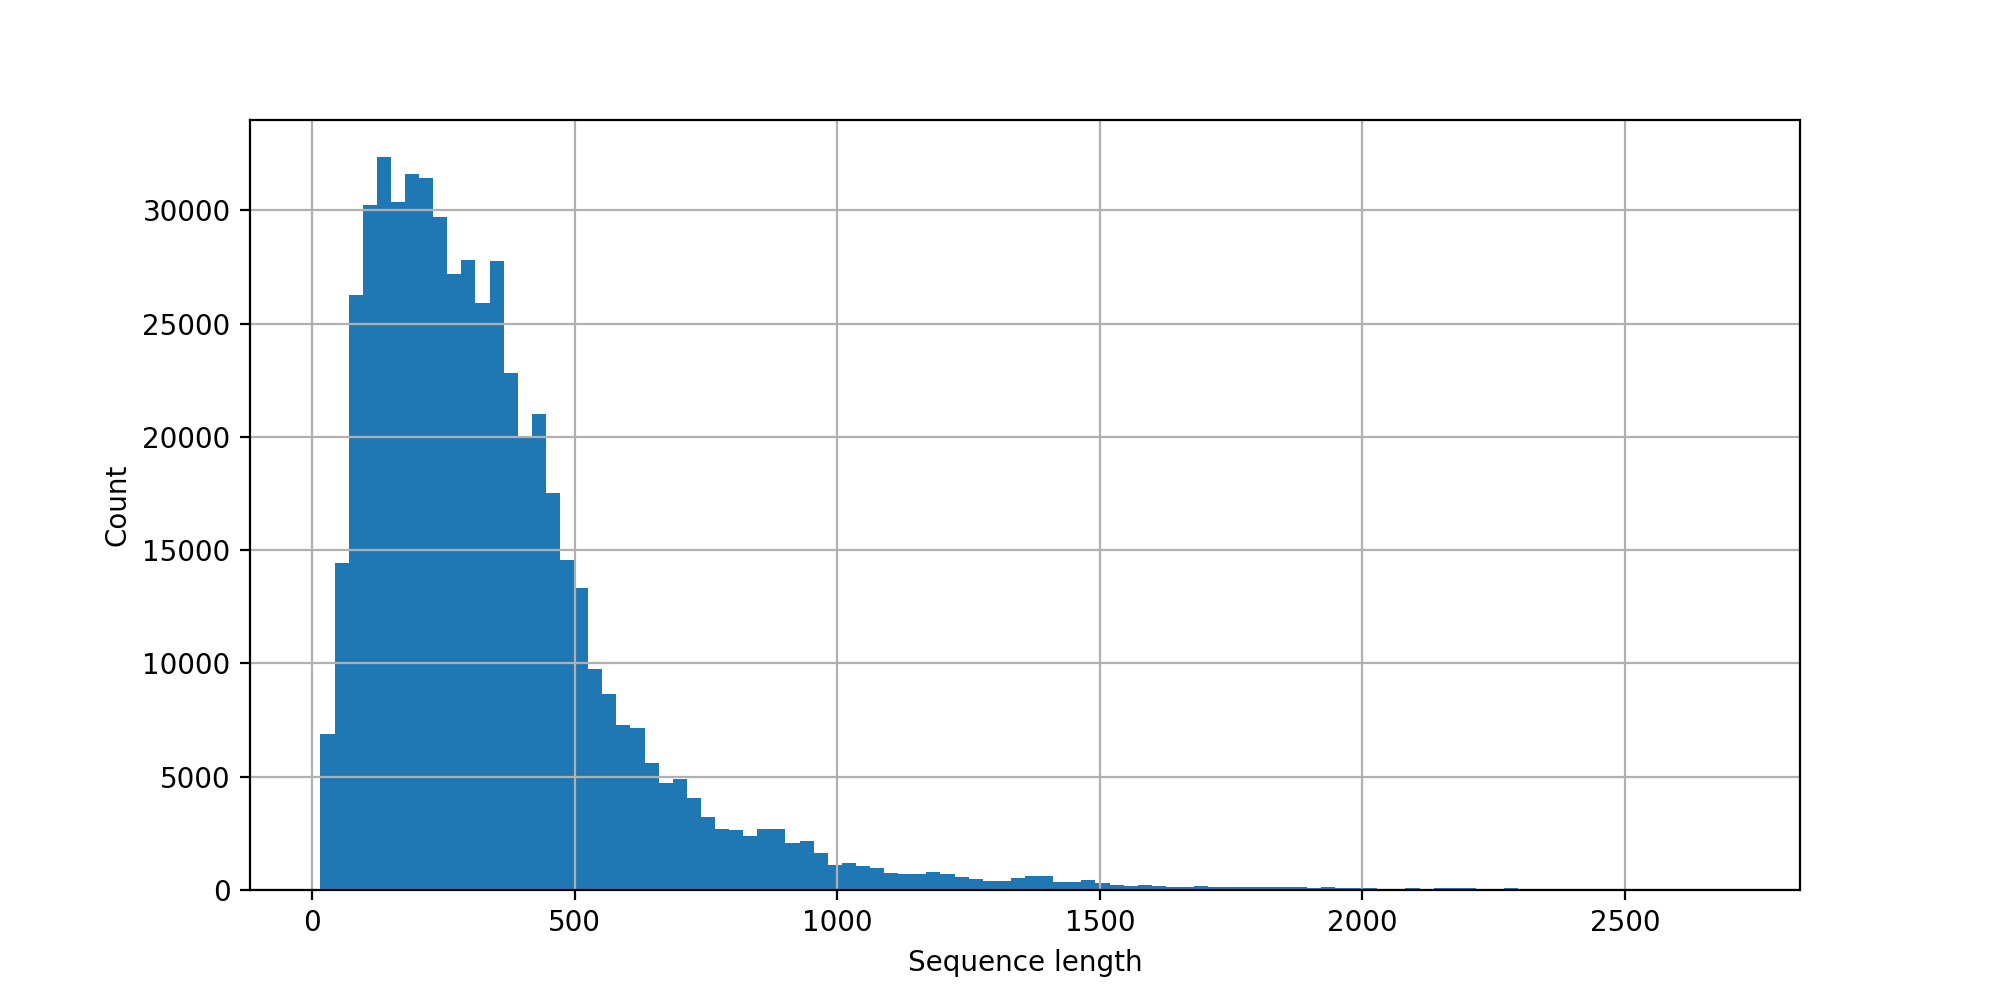

In [12]:
plt.figure(figsize=(10, 5))
_ = metadata_df.seq_len.hist(bins=100)
plt.xlabel('Sequence length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

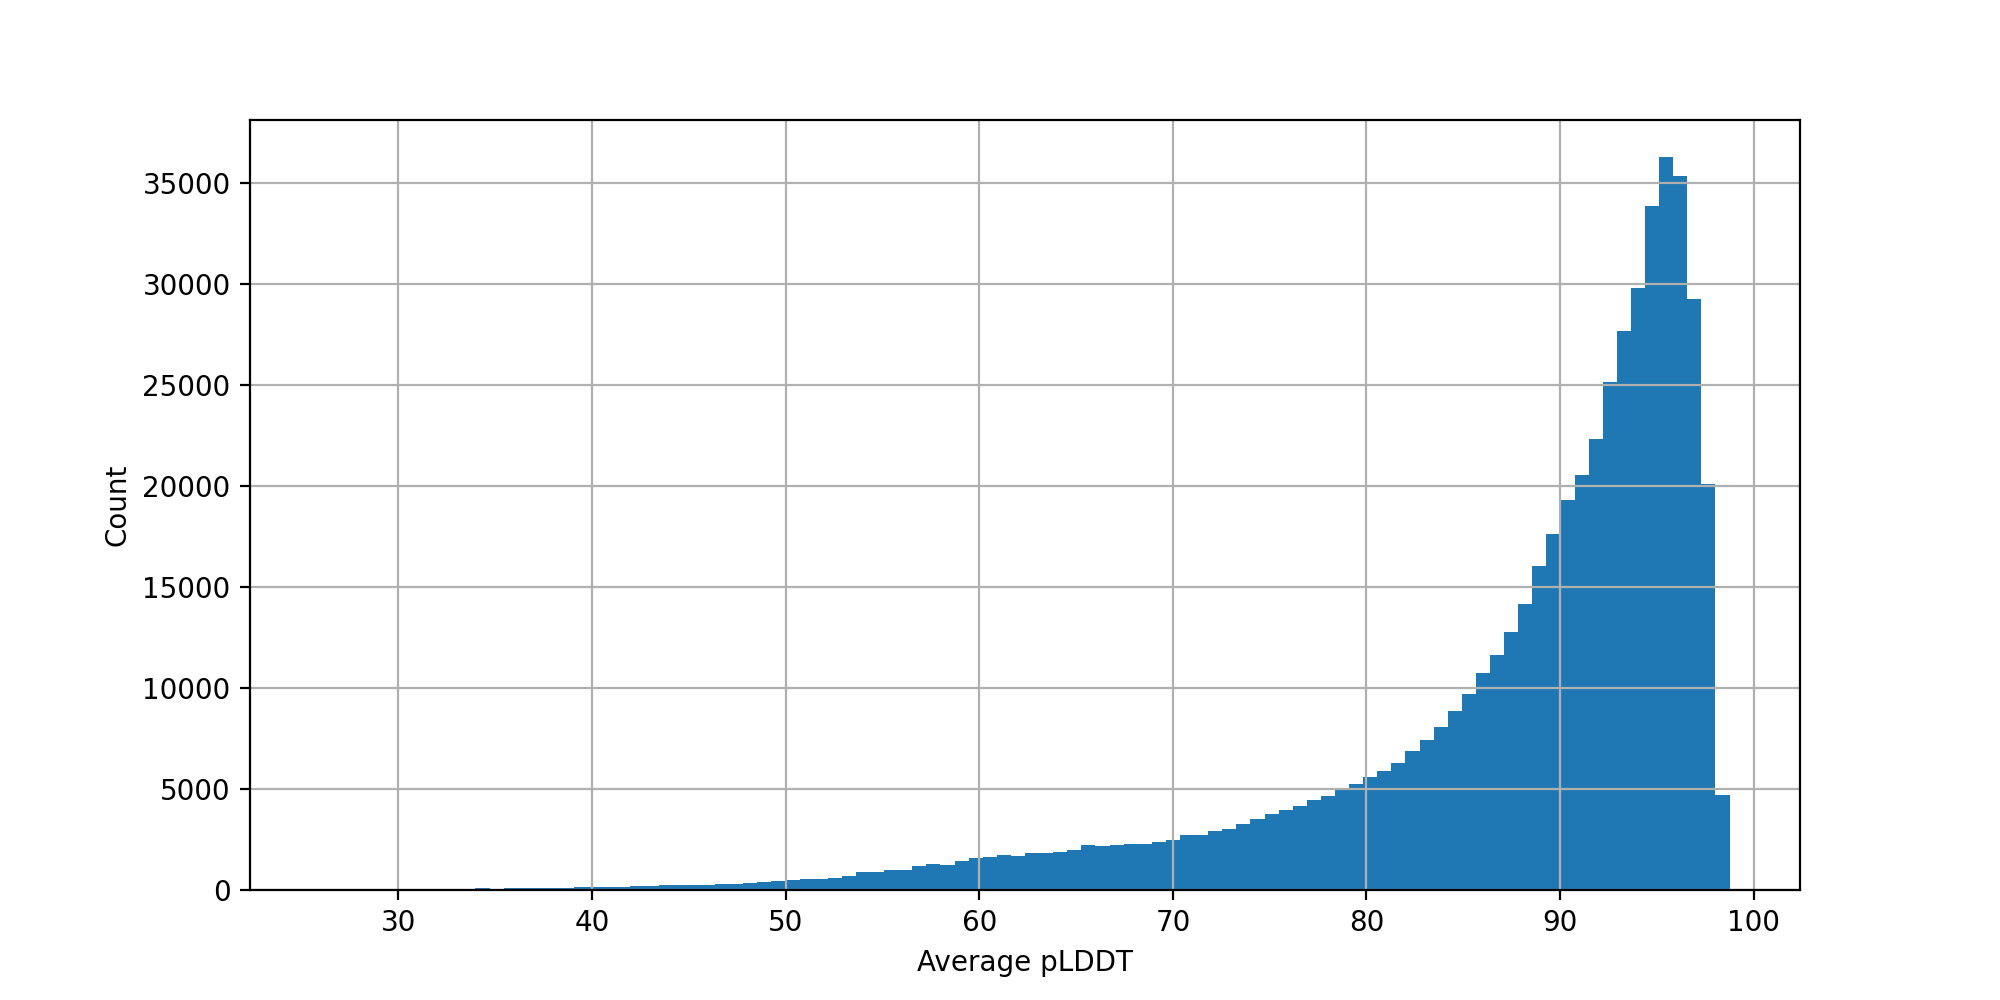

In [15]:
plt.figure(figsize=(10, 5))
_ = metadata_df.avg_plddt.hist(bins=100)
plt.xlabel('Average pLDDT')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(10, 5))
_ = metadata_df.avg_plddt.hist(bins=100)
plt.xlabel('Average pLDDT')
plt.ylabel('Count')

In [13]:
metadata_df.head()

,pdb_name,processed_path,raw_path,oligomeric_count,oligomeric_detail,num_chains,avg_plddt,num_confident_plddt,seq_len,modeled_seq_len,coil_percent,helix_percent,strand_percent,radius_gyration
0,AF-B1LHV9-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,89.454103,0.882051,195,195,0.502564,0.092308,0.405128,2.218788
1,AF-A6UZL1-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,92.549612,0.953488,129,129,0.480620,0.248062,0.271318,1.874236
2,AF-Q71VZ1-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,93.863693,0.989597,769,769,0.407022,0.409623,0.183355,3.241658
3,AF-Q6MDK5-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,75.476957,0.630435,92,92,0.358696,0.619565,0.021739,1.996741
4,AF-O67074-F1-model_v4,/Mounts/rbg-storage1/users/jyim/large_data/swi...,/Mounts/rbg-storage1/users/jyim/large_data/swi...,NaN,NaN,1,94.579406,0.955446,202,202,0.386139,0.440594,0.173267,1.731721


In [8]:
all_files = glob.glob(swissprot_dir + '/**/*.cif.gz')

In [9]:
all_files

['/Mounts/rbg-storage1/users/jyim/large_data/swiss_prot_processed/36/AF-W7MLD1-F1-model_v4.cif.gz']

In [6]:
len(all_files)

69

In [4]:
len(all_files)

542301

In [30]:
all_prefixes = list(range(350, 544)) + list(range(1, 100))
with open('all_files.sh', 'w') as f:
    for i, prefix in enumerate(all_prefixes):
        f.write(
            f'gunzip -df {prefix}/*.gz &\n'
        )
        if (i + 1) % 50 == 0:
            f.write('wait\n')
    # for i in range(350, 544):
    #     f.write(f'{i}/*.gz ')
    # for i in range(100):
    #     f.write(f'{i}/*.gz ')

In [ ]:

echo -e $args | xargs -I "{}" -P 2 ./process {}.


In [2]:
swissprot_dir = '/Mounts/rbg-storage1/users/jyim/large_data/swiss_prot'

In [29]:
all_swissprot_files = [x for x in glob.glob(swissprot_dir + '/*') if x.endswith('.cif.gz')]
subdir_prefix = []
prefix = 0
for i in range(len(all_swissprot_files)):
    if (i % 1000) == 0:
        prefix += 1
    subdir_prefix.append(prefix)

swissprot_df = pd.DataFrame({
    'path': all_swissprot_files,
    'prefix': subdir_prefix,
})

In [ ]:
write_dir = '/Mounts/rbg-storage1/users/jyim/large_data/swiss_prot_processed'
for i, row in swissprot_df.iterrows():
    path = row.path
    fname = os.path.basename(path)
    prefix = str(row.prefix)
    prefix_dir = os.path.join(write_dir, prefix)
    os.makedirs(prefix_dir, exist_ok=True)
    write_path = os.path.join(prefix_dir, fname)
    shutil.copy(path, write_path)
    if i % 100 == 0:
        print(f'On {i}')

In [21]:
write_dir = '/Mounts/rbg-storage1/users/jyim/large_data/swiss_prot_processed'
all_paths = glob.glob(os.path.join(write_dir, '*', '*'), recursive=True)

In [22]:
len(all_paths)

521933